In [14]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import pandas as pd
from chronos import ChronosPipeline
import torch

In [9]:
def load_wav(filepath):
    # Read the WAV file
    sample_rate, audio_data = wavfile.read(filepath)

    # Create a time array
    duration = len(audio_data) / sample_rate
    time = np.linspace(0., duration, len(audio_data))

    df = pd.DataFrame({
        'time': time,
        'audio_data': audio_data
    })

    return df, sample_rate

def plot_audio_data(df):
    fig, ax = plt.subplots(figsize=(12, 6))
    # Plot the audio data

    ax.plot(df['time'], df['audio_data'])
    ax.set_title('Audio Waveform')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    ax.grid()
    return fig, ax


In [8]:
audio_df, sample_rate = load_wav('/Users/dollerenshaw/code/chronos-forecasting/sample_timeseries/gettysburg10.wav')
audio_df

,time,audio_data
0,0.000000,59
1,0.000045,39
2,0.000091,16
3,0.000136,10
4,0.000181,-1
...,...,...
220563,10.002902,16
220564,10.002948,12
220565,10.002993,27
220566,10.003039,68


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Audio Waveform'}, xlabel='Time [s]', ylabel='Amplitude'>)

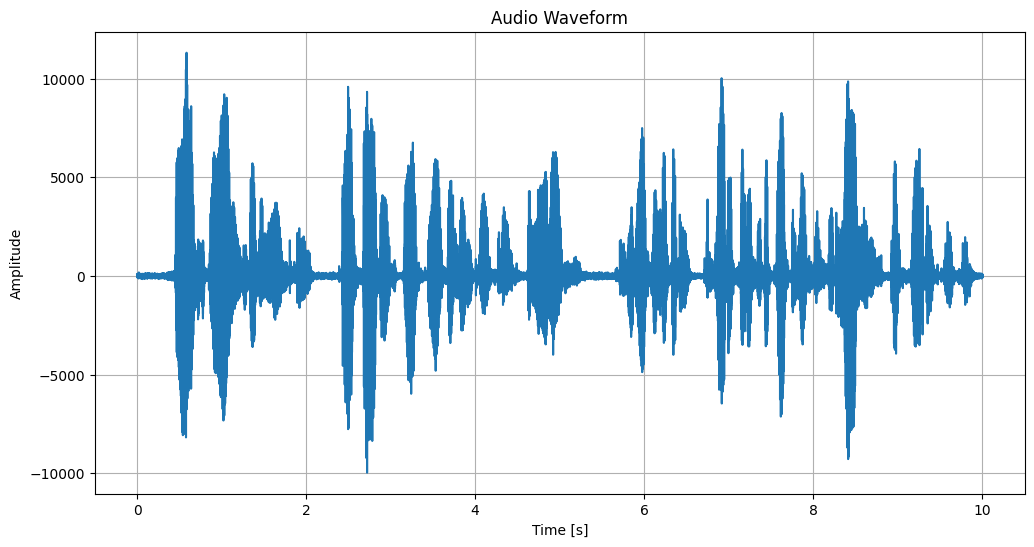

In [10]:
plot_audio_data(audio_df)

In [15]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)

In [21]:
forecast = pipeline.predict(
    context=torch.tensor(audio_df["audio_data"]),
    prediction_length=64,
    num_samples=20,
    limit_prediction_length=False,
)
forecast

tensor([[[ 36.0954,  12.0318,  15.9491,  ..., -17.6280, -15.6693, -17.9078],
         [ 41.9714,  26.8617,  12.8712,  ...,  19.0271,  24.0636,  19.0271],
         [ 70.2322,  74.1495,  45.8888,  ...,  38.8935,  43.9301,  38.0541],
         ...,
         [ 49.8061,  43.0907,  19.0271,  ...,  15.9491,  15.9491,  13.4308],
         [ 47.0080,  38.0541,  26.0223,  ...,  26.0223,  36.9349,  34.9762],
         [ 64.0764,  49.8061,  17.9078,  ..., -24.3434, -17.3482, -14.8299]]])

In [22]:
forecast = pipeline.predict(
    context=torch.tensor(audio_df["audio_data"]),
    prediction_length=640,
    num_samples=1,
    limit_prediction_length=False,
)
forecast

/Users/dollerenshaw/opt/anaconda3/envs/chronos/lib/python3.12/site-packages/chronos/chronos.py:503: UserWarning: We recommend keeping prediction length <= 64. The quality of longer predictions may degrade since the model is not optimized for it. 
  warnings.warn(msg)


tensor([[[ 24.0636,  10.9126,   8.9539,  15.9491,  17.9078,  26.0223,  14.5501,
            1.9587,   3.9173,   9.5135,   8.1145,  12.0318,  13.9905,  19.8665,
           19.0271,  22.1049,  20.9857,  40.0128,  48.1272,  45.8888,  35.8156,
           29.9396,  34.9762,  15.9491,  15.9491,  22.9444,  33.0175,  29.9396,
           38.0541,  34.1368,  26.0223,  31.8983,  29.1002,  15.9491,  13.9905,
           17.9078,  35.8156,  35.8156,  38.0541,  34.1368,  15.9491,   6.9952,
           15.9491,  20.9857,  34.1368,  45.8888,  36.9349,  47.8474,  49.8061,
           49.8061,  62.1177,  67.9937,  57.9206,  49.8061,  33.0175,  27.9810,
           24.0636,  12.0318,  17.9078,  27.9810,  26.0223,  17.9078,   1.9587,
          -21.5453, -20.1348, -15.1011,   3.9151,  13.9825,  27.1260,  27.1260,
           15.9401,  15.9401,  10.0674,   0.0000, -24.6092, -48.6591, -55.6504,
          -48.6591, -37.4731, -31.6004, -29.9225, -29.0836, -32.4394, -40.2696,
          -35.2359, -30.2022, -27.4057, 

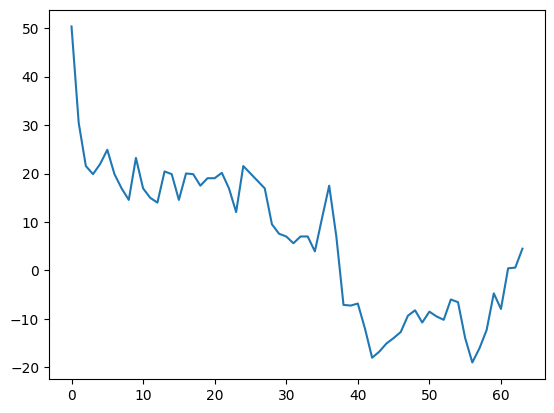

In [18]:
fig, ax = plt.subplots()

low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

ax.plot(
    median
)
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")